<a href="https://colab.research.google.com/github/hfzizzulhaq24/study_case_ds/blob/main/Study_Case_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

Data ini adalah data transaksi booking pelanggan hotel selama 3 tahun yaitu tahun 2017 - 2019 dengan terdapat kolom seperti yang tertera dibawah ini

| Kolom         | Penjelasan                                                          | Jenis Data   |
| ------------- | ------------------------------------------------------------------- | ----------------- |
| `is_canceled` | Apakah pemesanan dibatalkan atau tidak (1 = dibatalkan, 0 = tidak). | Binary (int) |
| `lead_time`                 | Jumlah hari antara tanggal pemesanan dan tanggal kedatangan. | Numeric (int)        |
| `arrival_date_year`         | Tahun kedatangan tamu.                                       | Numeric (int)        |
| `arrival_date_month`        | Bulan kedatangan tamu.                                       | Categorical (object) |
| `arrival_date_week_number`  | Nomor minggu dari tahun kedatangan.                          | Numeric (int)        |
| `arrival_date_day_of_month` | Tanggal kedatangan dalam satu bulan.                         | Numeric (int)  |      
| `stays_in_weekend_nights` | Jumlah malam akhir pekan (sabtu/minggu) yang dipesan. | Numeric (int) |
| `stays_in_week_nights`    | Jumlah malam hari kerja yang dipesan.                 | Numeric (int) |
| `adults`   | Jumlah tamu dewasa. | Numeric (int)                                  |
| `children` | Jumlah anak-anak.   | Numeric (float, karena bisa ada nilai kosong). |
| `babies`   | Jumlah bayi.        | Numeric (float).                               |
| `meal`                           | Jenis paket makanan (misal: Breakfast Only, Full Board).          | Categorical  |
| `country`                        | Negara asal tamu.                                                 | Categorical  |
| `market_segment`                 | Sumber pemesanan (misal: Online TA, Corporate, Direct).           | Categorical  |
| `distribution_channel`           | Jalur distribusi (misal: GDS, TA, Corporate).                     | Categorical  |
| `is_repeated_guest`              | Apakah tamu sudah pernah menginap sebelumnya (1 = ya, 0 = tidak). | Binary (int) |
| `previous_cancellations`         | Jumlah pembatalan pemesanan sebelumnya oleh tamu.                 | Numeric      |
| `previous_bookings_not_canceled` | Jumlah pemesanan sebelumnya yang tidak dibatalkan.                | Numeric      |
| `reserved_room_type` | Jenis kamar yang awalnya dipesan.                                    | Categorical |
| `assigned_room_type` | Jenis kamar yang akhirnya diberikan.                                 | Categorical |
| `booking_changes`    | Jumlah perubahan pada pemesanan.                                     | Numeric     |
| `deposit_type`       | Jenis deposit yang dilakukan (No Deposit / Non Refund / Refundable). | Categorical |
| `agent`              | ID agen pemesanan (jika ada).                                        | Numeric     |
| `company`            | ID perusahaan pemesan (jika ada).                                    | Numeric     |
| `days_in_waiting_list`        | Lama waktu pemesanan berada di daftar tunggu.                              | Numeric              |
| `customer_type`               | Jenis pelanggan (misal: Transient, Group, Contract).                       | Categorical          |
| `adr`                         | Average Daily Rate — pendapatan per malam dari kamar yang dipesan.         | Numeric (float)      |
| `required_car_parking_spaces` | Jumlah tempat parkir yang diminta.                                         | Numeric              |
| `total_of_special_requests`   | Jumlah permintaan khusus (misal: tempat tidur tambahan, pemandangan laut). | Numeric              |
| `reservation_status`          | Status akhir reservasi (Checked-Out, Canceled, No-Show).                   | Categorical          |
| `reservation_status_date`     | Tanggal ketika status terakhir ditetapkan.                                 | DateTime atau Object |


# import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
sns.set(style="whitegrid")

# Read Data

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

# Data Preprocessing

## Descrptive

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,83293.0,0.369503,0.482673,0.0,0.00,0.0,1.0,1.0
lead_time,83293.0,103.914230,106.874124,0.0,18.00,69.0,160.0,737.0
arrival_date_year,83293.0,2018.156808,0.706656,2017.0,2018.00,2018.0,2019.0,2019.0
arrival_date_week_number,83293.0,27.164023,13.623752,1.0,16.00,27.0,38.0,53.0
arrival_date_day_of_month,83293.0,15.786116,8.775931,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,83293.0,0.930390,1.004196,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,83293.0,2.503812,1.924511,0.0,1.00,2.0,3.0,50.0
adults,83293.0,1.854466,0.606139,0.0,2.00,2.0,2.0,55.0
children,83290.0,0.103614,0.398821,0.0,0.00,0.0,0.0,10.0
babies,83293.0,0.008032,0.100641,0.0,0.00,0.0,0.0,10.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
hotel,83293,64,Renaissance New York Times Square Hotel New Yo...,1373
arrival_date_month,83293,12,August,9643
meal,83293,5,BB,64424
country,82947,165,PRT,33952
market_segment,83293,8,Online TA,39445
distribution_channel,83293,5,TA/TO,68368
reserved_room_type,83293,10,A,60062
assigned_room_type,83293,11,A,51702
deposit_type,83293,3,No Deposit,72979
customer_type,83293,4,Transient,62535


In [7]:
df['country'].value_counts()

,count
country,
PRT,33952
GBR,8381
FRA,7243
ESP,5897
DEU,5107
...,...
MWI,1
SLE,1
MDG,1


Berdasarkan data di atas, terdapat sekitar 33.952 data pemesanan yang berasal dari negara Portugal (PRT). Oleh karena itu, pada analisis ini saya akan memfokuskan pembahasan hanya pada data pelanggan dari Portugal.

In [8]:
df_prt = df[df['country'] == 'PRT']

print(f"Jumlah data untuk negara PRT: {len(df_prt)} baris")
df_prt.sample(5)

Jumlah data untuk negara PRT: 33952 baris


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
29968,"Baltimore BWI Airport Courtyard Linthicum, MD",0,464,2019,July,30,25,0,4,2,...,229.0,NaN,0,Transient-Party,107.0,0,1,Check-Out,2019-07-29,29969
38181,"Hotel Maria Cristina, San Sebastian San Sebast...",1,269,2017,July,29,13,1,1,2,...,1.0,NaN,0,Contract,62.0,0,0,Canceled,2017-01-01,38182
71410,Newark Liberty International Airport Courtyard...,1,264,2017,July,28,8,0,2,2,...,1.0,NaN,0,Transient-Party,62.0,0,0,Canceled,2017-06-29,71411
2399,Sacramento Airport Natomas Courtyard Sacrament...,1,335,2017,September,38,17,0,1,1,...,5.0,NaN,0,Transient,55.0,0,0,Canceled,2017-05-14,2400
35437,Newark Liberty International Airport Courtyard...,1,2,2018,August,36,28,1,0,2,...,14.0,NaN,0,Transient,186.0,0,0,Canceled,2018-08-26,35438


## Alter Data

In [9]:
df_prt['reservation_status_date'] = pd.to_datetime(df_prt['reservation_status_date'])
df_prt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33952 entries, 1 to 83285
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           33952 non-null  object        
 1   is_canceled                     33952 non-null  int64         
 2   lead_time                       33952 non-null  int64         
 3   arrival_date_year               33952 non-null  int64         
 4   arrival_date_month              33952 non-null  object        
 5   arrival_date_week_number        33952 non-null  int64         
 6   arrival_date_day_of_month       33952 non-null  int64         
 7   stays_in_weekend_nights         33952 non-null  int64         
 8   stays_in_week_nights            33952 non-null  int64         
 9   adults                          33952 non-null  int64         
 10  children                        33949 non-null  float64       
 11  babies 

/tmp/ipython-input-3231486005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prt['reservation_status_date'] = pd.to_datetime(df_prt['reservation_status_date'])


Melakukan konversi data reservation status date ke data time

## Handling Missing Values

In [10]:
df_prt.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Ditemukan missing values pada beberapa kolom berikut:

* Children: 3 data hilang
* Agent: 7.708 data hilang
* Company: 30.797 data hilang

Kolom Company dan Agent memiliki jumlah data hilang yang cukup besar, mendekati sebagian besar total data. Karena kolom Company hanya berisi ID perusahaan yang tidak relevan dengan analisis utama, maka kolom ini dihapus.

In [11]:
## drop kolom yang tidak terpakai
df_prt = df_prt.drop(['agent','company'], axis=1)

In [12]:
# Handling Missing Values
for column in df_prt.select_dtypes(include=[np.number]).columns:
  df_prt[column].fillna(df_prt[column].mean(), inplace=True)

for column in df_prt.select_dtypes(include=[object]).columns:
  df_prt[column].fillna(df_prt[column].mode()[0], inplace=True)

df_prt.isnull().sum()

/tmp/ipython-input-1270020846.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prt[column].fillna(df_prt[column].mean(), inplace=True)
/tmp/ipython-input-1270020846.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Sudah tidak terdapat missing values

## Handling duplicate

In [13]:
print('Duplicate values is ', df_prt.duplicated().sum())

Duplicate values is  0


## Check Values

In [14]:
for col in df_prt.columns:
    print(f"\n{'-'*30} {col} {'-'*30}")
    print(df_prt[col].value_counts())


------------------------------ hotel ------------------------------
hotel
Renaissance New York Times Square Hotel New York, NY                      576
Hotel Maria Cristina, San Sebastian San Sebastian, Spain                  575
The Ritz-Carlton, Tokyo Tokyo, Japan                                      575
Protea Hotel by Marriott Midrand Midrand, South Africa                    568
Heidelberg Marriott Hotel Heidelberg, Germany                             566
                                                                         ... 
The House, Barbados Barbados                                              503
Protea Hotel by Marriott O.R. Tambo Airport Johannesburg, South Africa    502
Fort Worth University Drive Courtyard Fort Worth, TX                      501
Leipzig Marriott Hotel Leipzig, Germany                                   497
Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil      490
Name: count, Length: 64, dtype: int64

----------------------------

Ditemukan nilai “Undefined” pada tiga kolom kategorikal berikut:

* Meal
* Market Segment
* Distribution Channel

Karena ketiganya merupakan kolom bertipe kategorikal, maka penanganan dilakukan dengan mengganti nilai “Undefined” menggunakan nilai modus pada masing-masing kolom.


In [15]:
# Mengganti Undefinde Values
kolom_undefined = ['meal', 'market_segment', 'distribution_channel']

for kolom in kolom_undefined:
    mode_value = df_prt[kolom].mode()[0]
    df_prt[kolom] = df_prt[kolom].replace('Undefined', mode_value)
    print(f"Nilai 'Undefined' pada kolom '{kolom}' telah diganti dengan modus: {mode_value}")

for kolom in kolom_undefined:
    print(f"\nDistribusi nilai untuk kolom {kolom}:")
    print(df_prt[kolom].value_counts())

Nilai 'Undefined' pada kolom 'meal' telah diganti dengan modus: BB
Nilai 'Undefined' pada kolom 'market_segment' telah diganti dengan modus: Groups
Nilai 'Undefined' pada kolom 'distribution_channel' telah diganti dengan modus: TA/TO

Distribusi nilai untuk kolom meal:
meal
BB    28105
HB     4317
SC     1103
FB      427
Name: count, dtype: int64

Distribusi nilai untuk kolom market_segment:
market_segment
Groups           9658
Online TA        8427
Offline TA/TO    8381
Direct           4046
Corporate        2893
Complementary     471
Aviation           76
Name: count, dtype: int64

Distribusi nilai untuk kolom distribution_channel:
distribution_channel
TA/TO        25715
Direct        5046
Corporate     3176
GDS             15
Name: count, dtype: int64


## New Column Total Revenue

In [16]:
df_prt['total_revenue'] = (
    df_prt['adr'] *
    (df_prt['stays_in_weekend_nights'] + df_prt['stays_in_week_nights'])
)
df_prt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33952 entries, 1 to 83285
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           33952 non-null  object        
 1   is_canceled                     33952 non-null  int64         
 2   lead_time                       33952 non-null  int64         
 3   arrival_date_year               33952 non-null  int64         
 4   arrival_date_month              33952 non-null  object        
 5   arrival_date_week_number        33952 non-null  int64         
 6   arrival_date_day_of_month       33952 non-null  int64         
 7   stays_in_weekend_nights         33952 non-null  int64         
 8   stays_in_week_nights            33952 non-null  int64         
 9   adults                          33952 non-null  int64         
 10  children                        33952 non-null  float64       
 11  babies 

Data Siap melakukan Explorasi Data Analysis

In [17]:
df_clean = df_prt.copy()

# EDA

## Check Cancel Distribution

/tmp/ipython-input-1737933823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


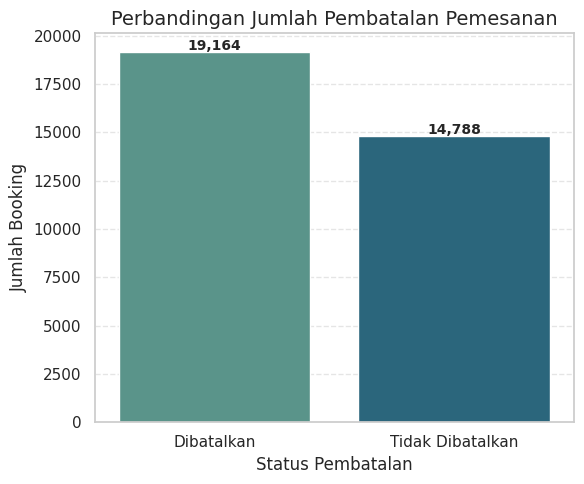

In [18]:
cancel_counts = df_clean['is_canceled'].value_counts().reset_index()
cancel_counts.columns = ['is_canceled', 'count']

cancel_counts['status'] = cancel_counts['is_canceled'].map({0: 'Tidak Dibatalkan', 1: 'Dibatalkan'})

plt.figure(figsize=(6,5))
sns.barplot(
    data=cancel_counts,
    x='status',
    y='count',
    palette='crest'
)
for index, row in cancel_counts.iterrows():
    plt.text(index, row['count'] + 100, f"{row['count']:,}", ha='center', fontsize=10, weight='bold')

plt.title('Perbandingan Jumlah Pembatalan Pemesanan', fontsize=14)
plt.xlabel('Status Pembatalan')
plt.ylabel('Jumlah Booking')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
cancel_percent = df_clean['is_canceled'].value_counts(normalize=True) * 100
cancel_percent = cancel_percent.rename(index={0: 'Tidak Dibatalkan', 1: 'Dibatalkan'})

print("Persentase Pembatalan Pemesanan:")
print(cancel_percent.round(1))

Persentase Pembatalan Pemesanan:
is_canceled
Dibatalkan          56.4
Tidak Dibatalkan    43.6
Name: proportion, dtype: float64


Berdasarkan hasil visualisasi, jumlah pelanggan yang melakukan pembatalan jauh lebih tinggi dibandingkan yang tidak, dengan total 19.164 pelanggan atau sekitar 56% dari seluruh data. Angka ini cukup signifikan dan berpotensi berdampak besar terhadap pendapatan hotel. Oleh karena itu, pihak manajemen perlu melakukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor yang memengaruhi keputusan pembatalan tersebut.

### Check Perbandingan Revenue NoCancel/Cancel

In [20]:
df_canceled = df_clean[df_clean['is_canceled'] == 1].copy()
df_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_revenue
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,Non Refund,0,Transient,62.80,0,0,Canceled,2017-10-21,2,125.60
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,Non Refund,0,Transient,110.00,0,0,Canceled,2018-11-25,3,330.00
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,No Deposit,0,Transient,57.92,0,1,Canceled,2017-08-24,5,289.60
5,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,...,Non Refund,0,Transient,62.80,0,0,Canceled,2017-08-10,6,188.40
12,Sheraton Grand Rio Hotel & Resort Rio de Janei...,1,101,2018,June,27,27,1,5,1,...,Non Refund,0,Transient,140.00,0,0,Canceled,2018-05-06,13,840.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83274,"W New York – Times Square New York, NY",1,447,2018,September,40,29,0,2,2,...,Non Refund,0,Transient,62.00,0,0,Canceled,2017-10-21,83275,124.00
83275,"W London – Leicester Square London, United Kin...",1,31,2017,November,45,2,1,0,2,...,No Deposit,0,Transient,85.50,0,1,Canceled,2017-10-02,83276,85.50
83277,Residence Inn Rio de Janeiro Barra da Tijuca B...,1,292,2017,August,32,5,0,2,2,...,Non Refund,0,Transient-Party,62.00,0,0,Canceled,2017-07-02,83278,124.00
83281,"Frankfurt Marriott Hotel Frankfurt, Germany",1,82,2018,May,21,21,2,4,2,...,No Deposit,0,Transient,62.83,0,1,Canceled,2018-03-01,83282,376.98


In [21]:
df_canceled['total_revenue'] = (
    df_canceled['adr'] *
    (df_canceled['stays_in_weekend_nights'] + df_canceled['stays_in_week_nights'])
)

total_revenue_canceled = df_canceled['total_revenue'].sum()
print(f"Total Potential Revenue Loss from Canceled Bookings: ${total_revenue_canceled:,.2f}")

Total Potential Revenue Loss from Canceled Bookings: $5,987,648.28


Untuk Potensial Loss sekitar 5M hampir mendekati 6M untuk Customer yang melakukan canceled

In [22]:
## Persentase Total Loss dan revenue
total_revenue_all = df_clean['total_revenue'].sum()
loss_percentage = (total_revenue_canceled / total_revenue_all) * 100
print(f"Total Potential Revenue Bookings: ${total_revenue_all:,.2f}")
print(f"Revenue loss due to cancellations: {loss_percentage:.2f}%")

Total Potential Revenue Bookings: $9,894,562.99
Revenue loss due to cancellations: 60.51%


Total Revenue apabila estimasi customer yang tidak melakukan cancel itu sekitar 9M lebih dengan persentasi Loss sekitar 60%

Sehingga dengan ini analisis selanjutnya akan dilakukan untuk meminimalisir customer melakukan cancel pada hotel

## Check Correlation Numerik

In [23]:
num_cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests', 'is_canceled'
]

numeric_df = df_clean[num_cols]
corr = numeric_df.corr()

corr_with_cancel = corr['is_canceled'].sort_values(ascending=False)
print(corr_with_cancel)

is_canceled                       1.000000
lead_time                         0.464195
stays_in_week_nights              0.141868
adults                            0.112729
stays_in_weekend_nights           0.102725
previous_cancellations            0.101743
days_in_waiting_list              0.084386
adr                               0.028189
babies                           -0.051584
children                         -0.060103
previous_bookings_not_canceled   -0.129430
booking_changes                  -0.222802
total_of_special_requests        -0.272551
required_car_parking_spaces      -0.294908
Name: is_canceled, dtype: float64


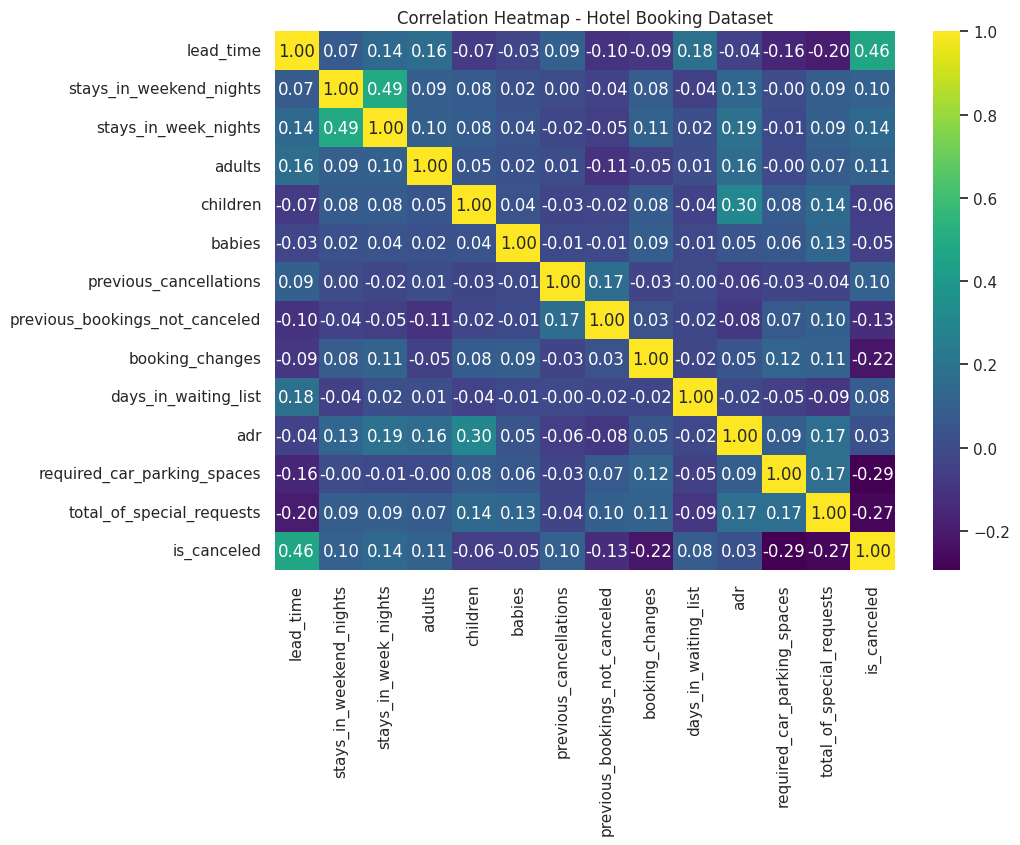

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap - Hotel Booking Dataset")
plt.show()

Karena dataset ini memiliki cukup banyak fitur numerik, maka dilakukan pemeriksaan multikolinearitas (correlation check) untuk mengetahui fitur mana yang memiliki hubungan paling kuat terhadap variabel pembatalan (is_canceled).

Berdasarkan hasil analisis korelasi, beberapa fitur yang memiliki korelasi paling tinggi terhadap pembatalan adalah:

* Lead Time: 0.46
* Required Car Parking Spaces: 0.29
* Total of Special Requests: 0.27

Nilai-nilai tersebut menunjukkan bahwa semakin tinggi nilai pada fitur-fitur di atas, semakin besar kemungkinan pelanggan melakukan pembatalan.

### Korelasi antara Booking cencel dan Lead Time

/tmp/ipython-input-3265378128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


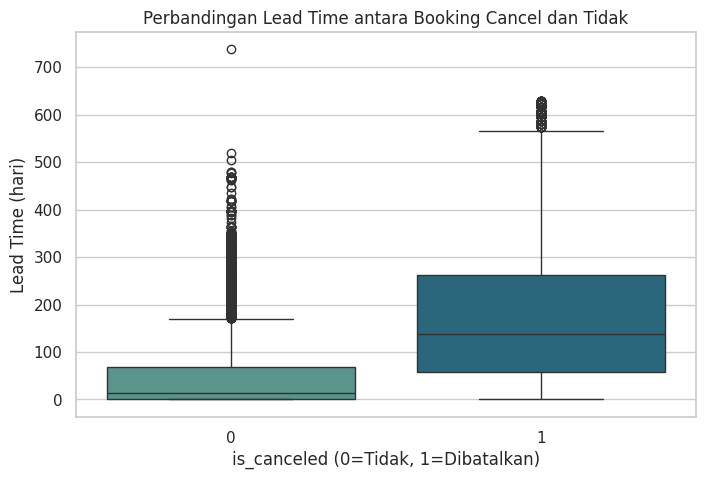

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='is_canceled',
    y='lead_time',
    data=df_clean,
    palette='crest'
)

plt.title('Perbandingan Lead Time antara Booking Cancel dan Tidak')
plt.xlabel('is_canceled (0=Tidak, 1=Dibatalkan)')
plt.ylabel('Lead Time (hari)')
plt.show()

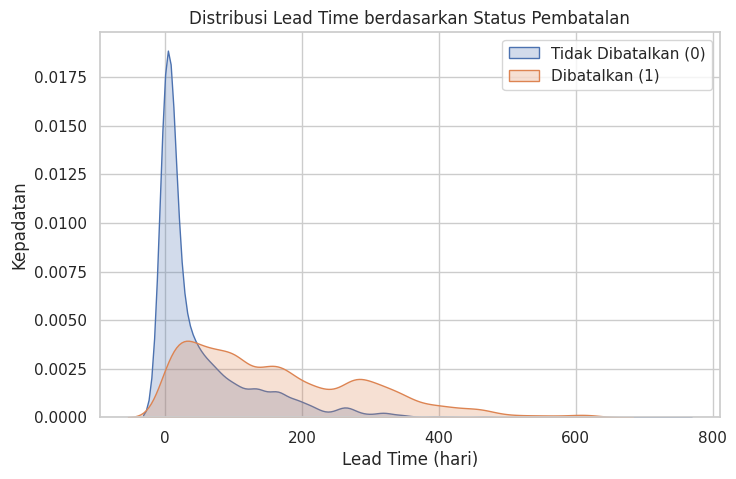

In [26]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_clean.loc[df_clean['is_canceled'] == 0, 'lead_time'], label='Tidak Dibatalkan (0)', fill=True)
sns.kdeplot(df_clean.loc[df_clean['is_canceled'] == 1, 'lead_time'], label='Dibatalkan (1)', fill=True)
plt.title('Distribusi Lead Time berdasarkan Status Pembatalan')
plt.xlabel('Lead Time (hari)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Insight :
* Customer dengan lead time panjang (0–400 hari) memiliki tingkat pembatalan yang lebih tinggi.
* Customer yang tidak melakukan pembatalan umumnya memiliki lead time pendek (0–50 hari).
* Terlihat adanya kecenderungan bahwa semakin lama waktu antara pemesanan dan tanggal menginap, semakin besar kemungkinan pembatalan terjadi.

Asumsi :
* Kemungkinan penyebab utama adalah karena customer yang memesan jauh-jauh hari memiliki lebih banyak waktu untuk mengubah rencana perjalanan, membandingkan harga dengan hotel lain, atau mendapatkan penawaran yang lebih baik, sehingga peluang untuk membatalkan pemesanan menjadi lebih tinggi.

### Korelasi antara Spesial Req dan Booking Cencel

/tmp/ipython-input-3996139877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=req_cancel, x='total_of_special_requests', y='is_canceled', palette='crest')


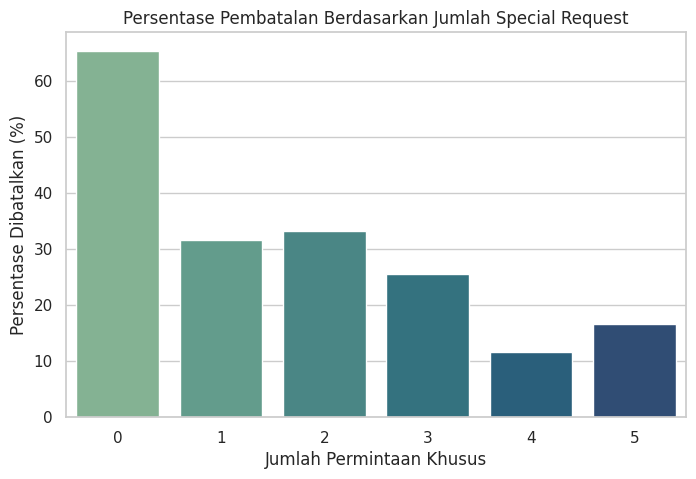

In [27]:
req_cancel = df_clean.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()
req_cancel['is_canceled'] *= 100  # ubah ke persen

plt.figure(figsize=(8,5))
sns.barplot(data=req_cancel, x='total_of_special_requests', y='is_canceled', palette='crest')
plt.title('Persentase Pembatalan Berdasarkan Jumlah Special Request')
plt.xlabel('Jumlah Permintaan Khusus')
plt.ylabel('Persentase Dibatalkan (%)')
plt.show()

Rata-rata customer yang paling banyak tidak melakukan request sekitar lebih dari 60%, sedangkan customer yang melakukan request memiliki rata-rata pembatalan pemesanan sekitar sekitar 11% - 32%

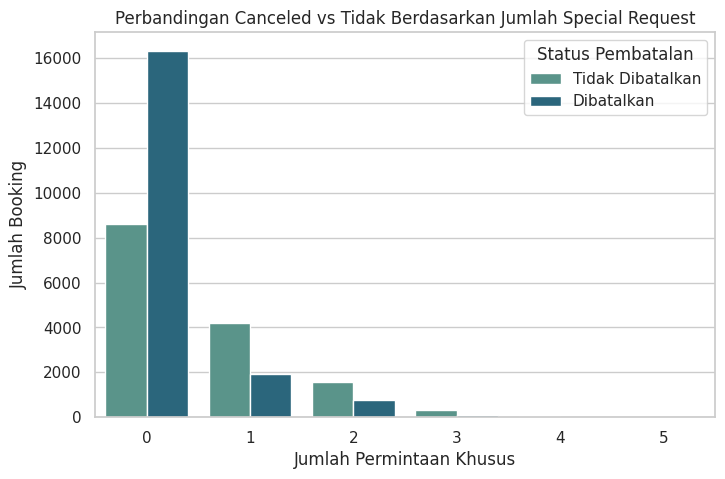

In [28]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df_clean,
    x='total_of_special_requests',
    hue='is_canceled',
    palette='crest'
)

plt.title('Perbandingan Canceled vs Tidak Berdasarkan Jumlah Special Request')
plt.xlabel('Jumlah Permintaan Khusus')
plt.ylabel('Jumlah Booking')
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()

Insight :
* Sebagian besar customer yang membatalkan pemesanan adalah mereka yang tidak memiliki special request, yaitu sekitar 16.000 customer.
* Semakin banyak jumlah permintaan khusus (special request), maka tingkat pembatalan semakin menurun.
* Customer yang memiliki lebih dari satu permintaan khusus cenderung lebih berkomitmen terhadap pesanannya.

Asumsi :
* Customer tanpa special request kemungkinan melakukan pemesanan tanpa perencanaan matang atau tidak terlalu peduli terhadap detail pengalaman menginap, sehingga lebih mudah membatalkan.

### Korelasi Antara Req Parking car dengan cenceled

/tmp/ipython-input-2935260999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='required_car_parking_spaces', palette='crest')


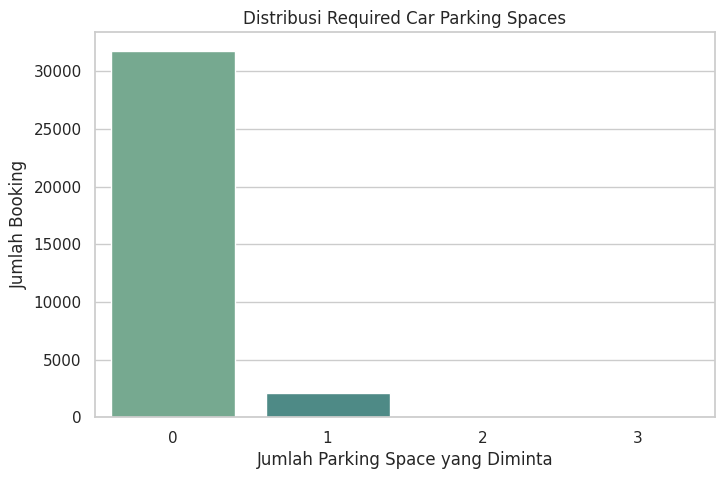

In [29]:
# Distribusi customer req parking spaces
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='required_car_parking_spaces', palette='crest')
plt.title('Distribusi Required Car Parking Spaces')
plt.xlabel('Jumlah Parking Space yang Diminta')
plt.ylabel('Jumlah Booking')
plt.show()

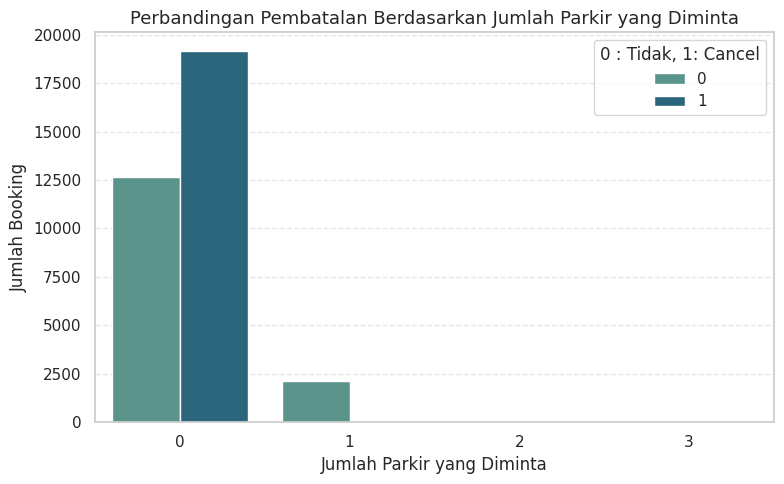

In [30]:
# Hitung jumlah pelanggan cancel vs tidak cancel per jumlah parkir
parking_cancel = (
    df_clean.groupby(['required_car_parking_spaces', 'is_canceled'])
      .size()
      .reset_index(name='count')
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=parking_cancel,
    x='required_car_parking_spaces',
    y='count',
    hue='is_canceled',
    palette='crest'
)

plt.title('Perbandingan Pembatalan Berdasarkan Jumlah Parkir yang Diminta', fontsize=13)
plt.xlabel('Jumlah Parkir yang Diminta')
plt.ylabel('Jumlah Booking')
plt.legend(title='0 : Tidak, 1: Cancel')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Insight :
* Customer yang tidak meminta tempat parkir (0) memiliki jumlah pembatalan paling tinggi, yaitu sekitar 18.000 pembatalan.
* Sebaliknya, customer yang meminta parkir (1) memiliki tingkat pembatalan yang lebih rendah secara signifikan.

Asumsi :
* Customer yang tidak membutuhkan tempat parkir kemungkinan besar berasal dari luar kota atau menggunakan transportasi umum, sehingga rencana perjalanan mereka lebih mudah berubah dan berpotensi membatalkan pemesanan.
Sedangkan customer yang memesan tempat parkir cenderung sudah memiliki rencana perjalanan yang lebih pasti dan matang, sehingga kemungkinan pembatalan lebih kecil.

## Korelasi Kolom Kategori dengan Kolom Canceled

In [31]:
from itertools import combinations
# Fungsi Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))

# Buat matriks korelasi antar fitur kategorikal
def categorical_corr_matrix(df):
    cat_cols = df.select_dtypes(include=['object']).columns
    matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

    for col1, col2 in combinations(cat_cols, 2):
        v = cramers_v(df[col1], df[col2])
        matrix.loc[col1, col2] = v
        matrix.loc[col2, col1] = v

    np.fill_diagonal(matrix.values, 1.0)
    return matrix

/tmp/ipython-input-21188862.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))
/tmp/ipython-input-21188862.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))
/tmp/ipython-input-21188862.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))
/tmp/ipython-input-21188862.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))
/tmp/ipython-input-21188862.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))
/tmp/ipython-input-21188862.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))
/tmp/ipython-input-21188862.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((chi2 / n) / (min(k - 1, r

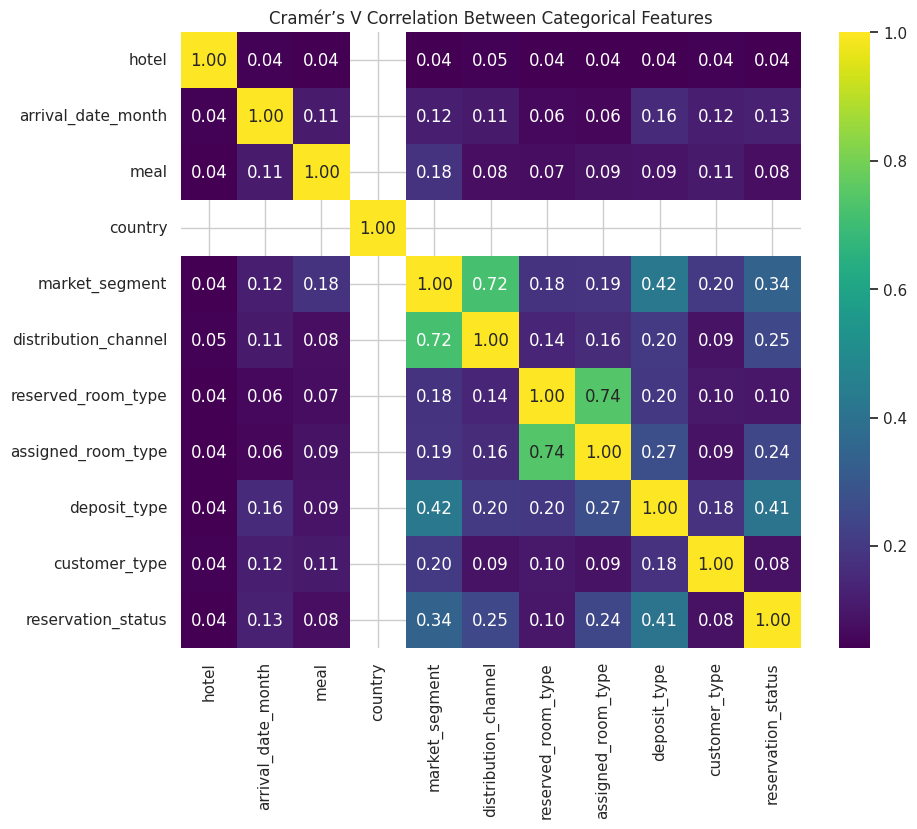

In [32]:
cat_corr_matrix = categorical_corr_matrix(df_clean)

plt.figure(figsize=(10,8))
sns.heatmap(cat_corr_matrix, annot=True,cmap='viridis', fmt=".2f")
plt.title("Cramér’s V Correlation Between Categorical Features")
plt.show()

Dari hasil korelasi antar feature di atas memiliki nilai yang cukup tinggi sehingga salah satu dari feature dengan nilai korelasi yang tinggi tidak di gunakan, adapun feature dengan nilai korelasi yang cukup tinggi adalaha

*   distribution_channel x market_segment (0.72)
*   assigned_room_type x reserved_room_type (0.74)

dari ke 4 feature di atas akan di pilih satu dengan nilai korelasi antar feature canceled yang tinggi

In [33]:
def categorical_correlation(df_clean, target_col='is_canceled'):
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    results = []

    for col in cat_cols:
        v = cramers_v(df_clean[col], df_clean[target_col])
        results.append({'Feature': col, 'CramersV': v})

    result_df_clean = pd.DataFrame(results).sort_values(by='CramersV', ascending=False).reset_index(drop=True)
    return result_df_clean

corr_cat = categorical_correlation(df_clean)
print(corr_cat)

                 Feature  CramersV
0     reservation_status  1.000000
1           deposit_type  0.560708
2         market_segment  0.471163
3   distribution_channel  0.345999
4     assigned_room_type  0.338133
5     arrival_date_month  0.162590
6     reserved_room_type  0.136576
7          customer_type  0.116560
8                   meal  0.098401
9                  hotel  0.043359
10               country       NaN


/tmp/ipython-input-21188862.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))


Karna nilai feature market_segment memiliki nilai korelasi yang cukup tinggi dibandingkan distribution channel sehingga untuk korelasi feature dengan kolom canceled di dapatkan :
* Deposit Type (0.56)
* Market Segment (0.47)

Kedua feature kategorikal diatas adalah feature dengan pengaruh tertinggi terhadap customer yang melakukan canceled

### Type Of Deposit

/tmp/ipython-input-4261562306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='deposit_type', palette='crest')


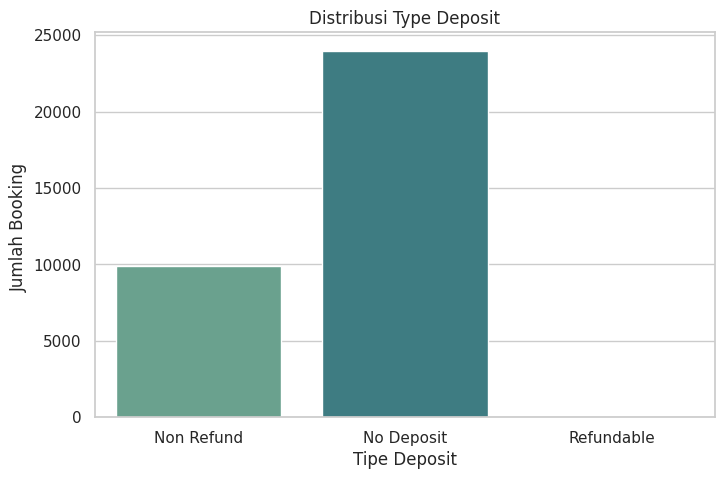

In [34]:
# Distribusi Type Of deposit
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='deposit_type', palette='crest')
plt.title('Distribusi Type Deposit')
plt.xlabel('Tipe Deposit')
plt.ylabel('Jumlah Booking ')
plt.show()

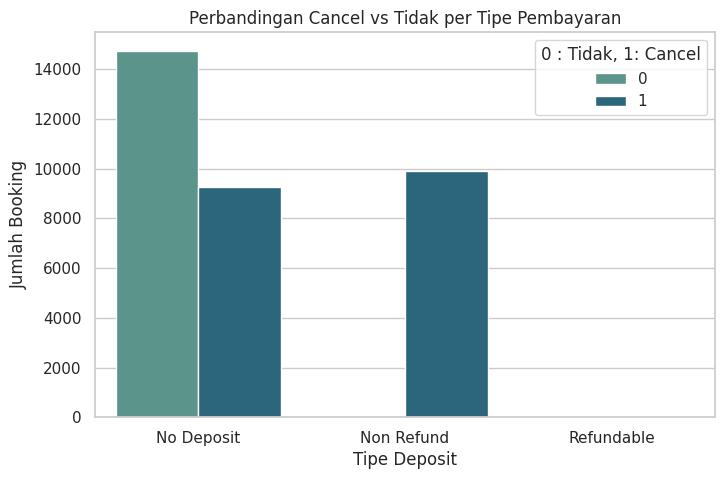

In [35]:
deposit_cancel_counts = df_clean.groupby(['deposit_type', 'is_canceled']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.barplot(
    x='deposit_type',
    y='count',
    hue='is_canceled',
    data=deposit_cancel_counts,
    palette='crest'
)

plt.title('Perbandingan Cancel vs Tidak per Tipe Pembayaran')
plt.xlabel('Tipe Deposit')
plt.ylabel('Jumlah Booking')
plt.legend(title='0 : Tidak, 1: Cancel')
plt.show()

Insight :
* Tipe pembayaran “No Deposit” memiliki jumlah pembatalan tertinggi sekitar 9.000 pembatalan dari total 14.000 booking.
* Tipe “Non Refund” juga menunjukkan tingkat pembatalan yang cukup tinggi dibandingkan tipe lainnya.

Asumsi :
* No Deposit: Mudah dibatalkan karena pelanggan tidak membayar di awal.
* Non Refund: Pembatalan tetap tinggi kemungkinan karena alasan darurat atau pelanggan tidak memahami kebijakan.

### Type Of Segment


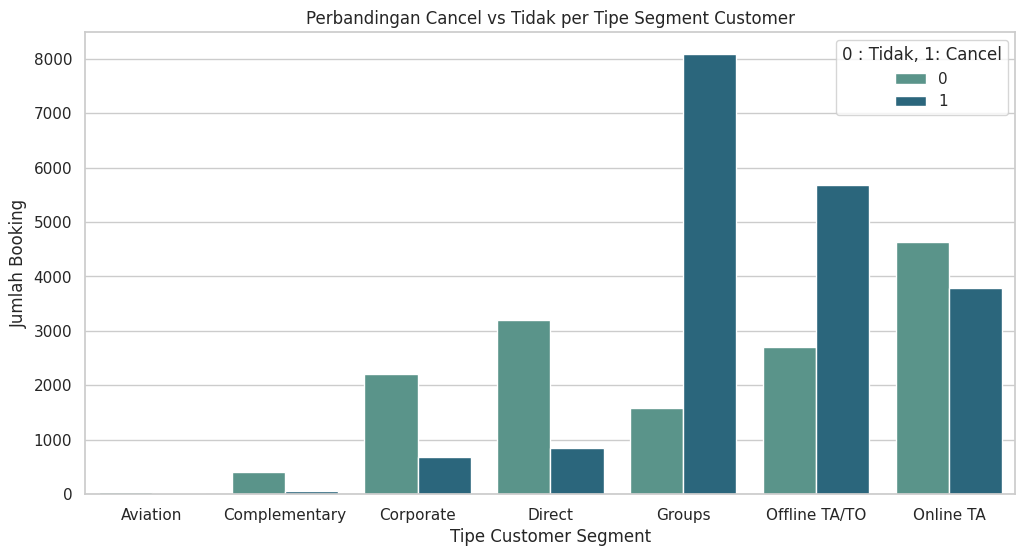

In [36]:
deposit_cancel_counts = df_clean.groupby(['market_segment', 'is_canceled']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(
    x='market_segment',
    y='count',
    hue='is_canceled',
    data=deposit_cancel_counts,
    palette='crest'
)

plt.title('Perbandingan Cancel vs Tidak per Tipe Segment Customer')
plt.xlabel('Tipe Customer Segment')
plt.ylabel('Jumlah Booking')
plt.legend(title='0 : Tidak, 1: Cancel')
plt.show()


Insight :

* Segmen Groups memiliki tingkat pembatalan tertinggi yaitu sekitar 9.600 booking, lebih dari 8.000 di antaranya dibatalkan, menunjukkan bahwa pemesanan grup cenderung tidak stabil dan bersifat tentatif.
* Segmen Offline TA/TO juga menunjukkan tingkat pembatalan tinggi dari total sekitar 8.300 booking, lebih dari 5.000 dibatalkan. Ini menandakan bahwa agen perjalanan tradisional berisiko tinggi terhadap pembatalan.
* Segmen Online TA memiliki sekitar 3.800 pembatalan dari 8.400 booking. Hal ini mengindikasikan bahwa pelanggan yang memesan secara online lebih mudah membatalkan pesanan karena sistem digital yang lebih fleksibel.

Asumsi :
* Groups: Pembatalan kemungkinan disebabkan oleh perubahan jadwal secara massal atau kendala internal dalam kelompok.
* Offline TA/TO: Kemungkinan karena proses konfirmasi manual yang memakan waktu lebih lama, sehingga meningkatkan potensi pembatalan.
* Online TA: Tingginya pembatalan dapat disebabkan oleh kemudahan sistem pembatalan online dan pelanggan yang menemukan penawaran hotel lain yang lebih murah atau lebih sesuai

# VIF Multicorelation

In [37]:
df_clean_2 = df_clean

## Split Data for Numeric and Categoric

### Numeric

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

df_clean_2_col = df_clean_2[df_clean_2.select_dtypes(include = ['int64', 'float64']).columns.tolist()]
X = add_constant(df_clean_2_col)
vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vif_score
1,is_canceled,1.542175
2,lead_time,1.438063
3,arrival_date_year,1.673680
4,arrival_date_week_number,1.637398
5,arrival_date_day_of_month,1.010314
6,stays_in_weekend_nights,1.770594
7,stays_in_week_nights,2.735087
8,adults,1.091118
9,children,1.124344
10,babies,1.027883


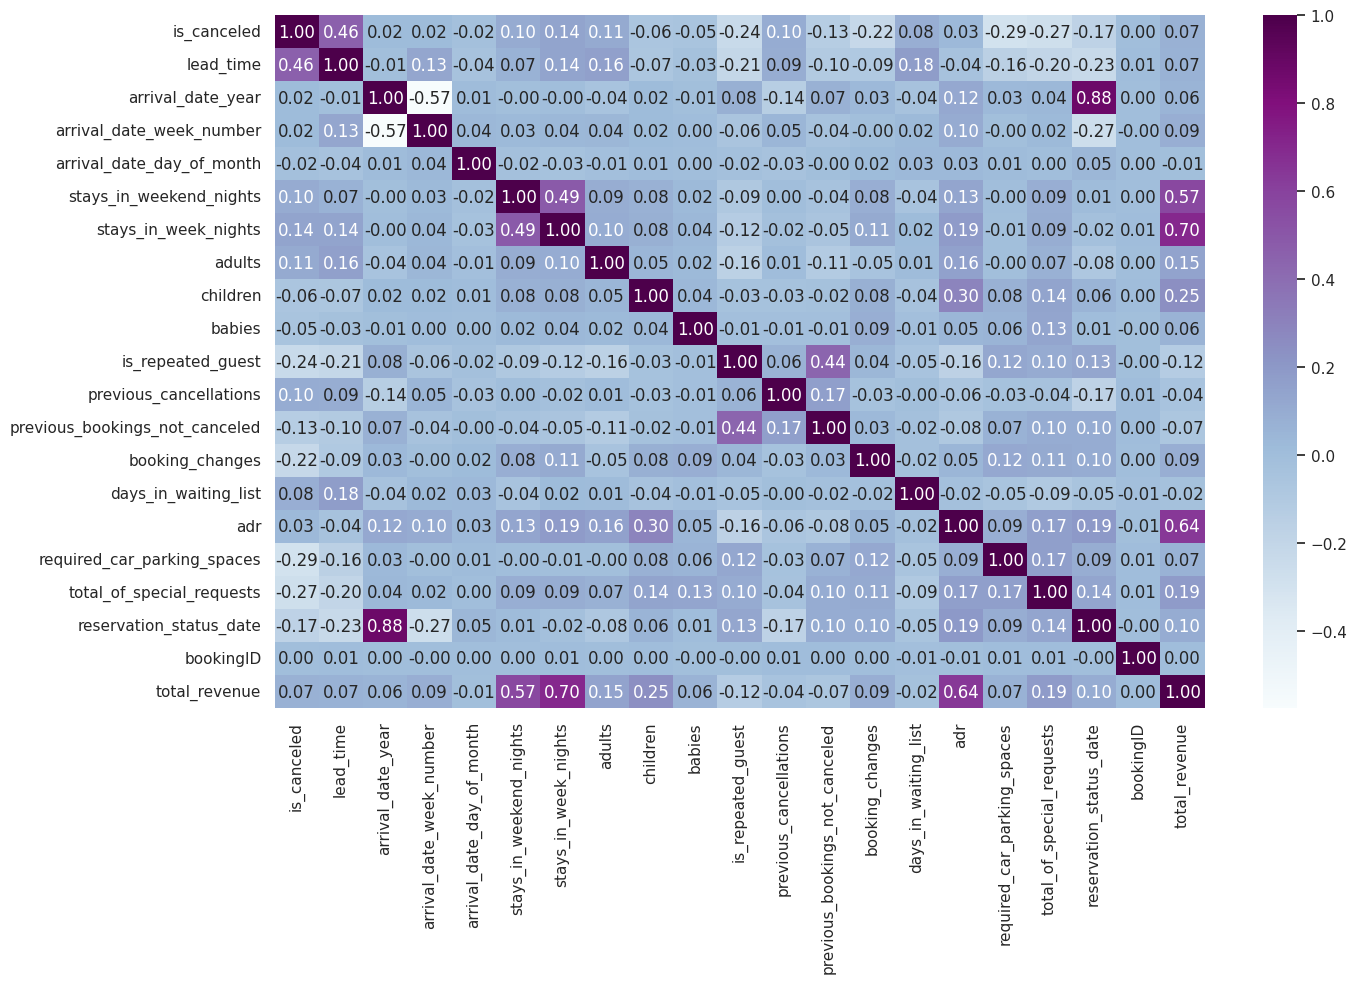

In [39]:
#heatmap correlation
df_clean_2_col = df_clean_2[df_clean_2.select_dtypes(exclude = 'object').columns.tolist()]

corr = df_clean_2_col.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BuPu')
plt.show()

* arrival date year x reservaion status date
* stays in week night x total revenue



### Categoric

In [40]:
col_useless = ['hotel','bookingID','country','reservation_status']

for x in col_useless:
  df_clean_2 = df_clean_2.drop(x, axis = 1)

In [41]:
cat_columns = df_clean_2.select_dtypes(include=['object','category']).columns.tolist()

In [42]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

In [43]:
#show score from creamers_v
from scipy.stats import chi2_contingency

print("\n===== Cramér’s V Scores Between Categorical Columns =====")
for i in range(len(cat_columns)):
    for j in range(i + 1, len(cat_columns)):
        var1 = cat_columns[i]
        var2 = cat_columns[j]
        score = cramers_v(df_clean_2[var1], df_clean_2[var2])
        if not pd.isna(score) and score > 0.3:
            print(f"{var1} vs {var2}: {round(score, 3)}")


===== Cramér’s V Scores Between Categorical Columns =====
market_segment vs distribution_channel: 0.718
market_segment vs deposit_type: 0.423
reserved_room_type vs assigned_room_type: 0.744


* Market segment
* assigned room type

### Drop Multicol

In [44]:
drop_col = ['market_segment','assigned_room_type','arrival_date_year','stays_in_week_nights',
            'arrival_date_day_of_month','arrival_date_week_number','customer_type','meal']

for x in drop_col:
  df_clean_2 = df_clean_2.drop(x, axis = 1)

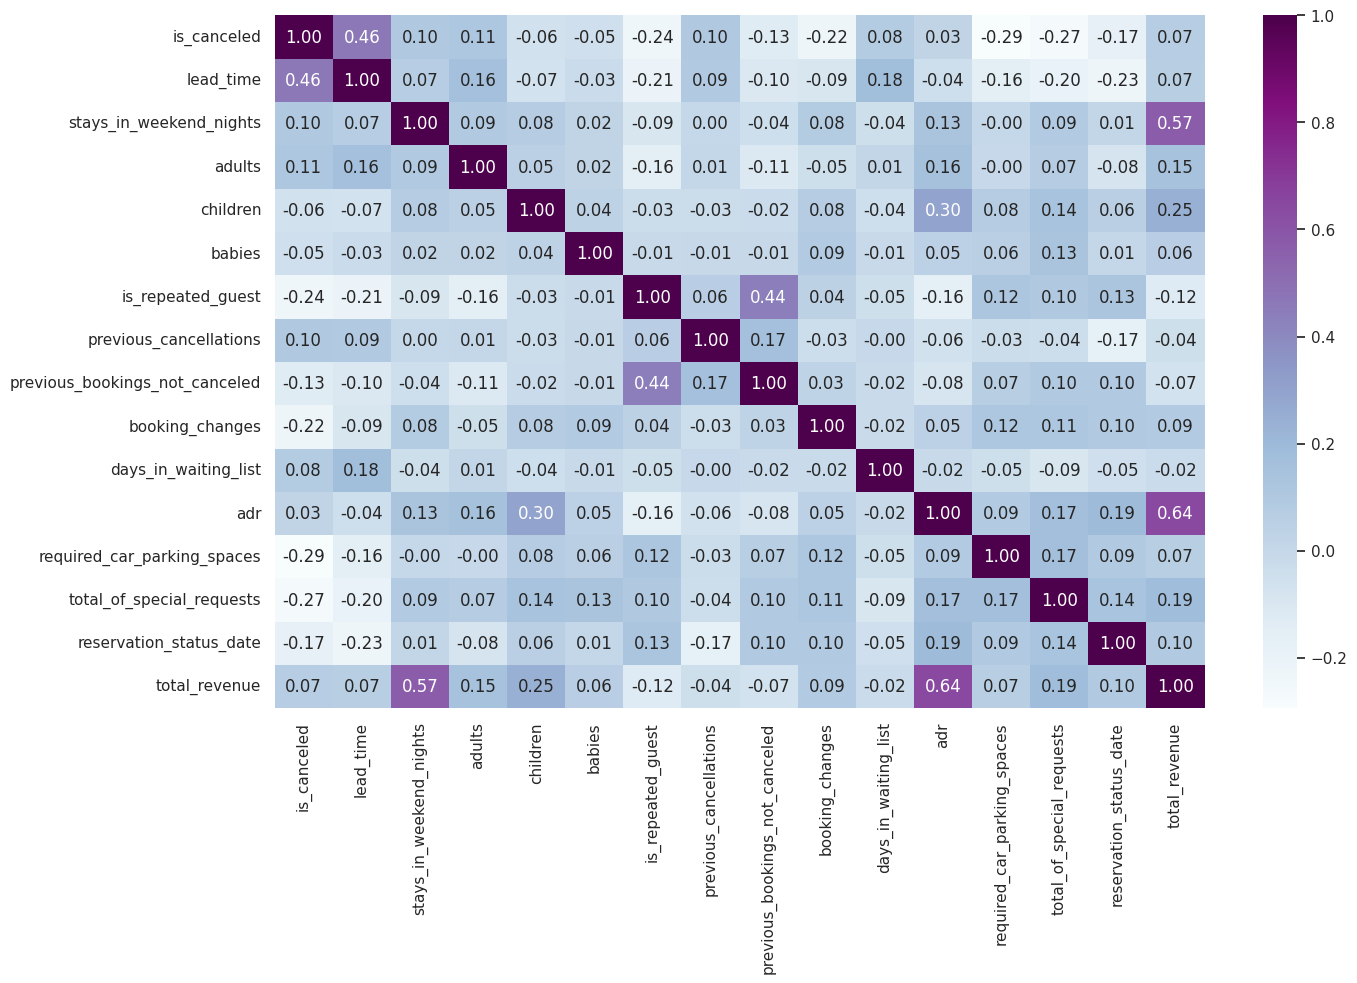

In [45]:
df_clean_2_col = df_clean_2[df_clean_2.select_dtypes(exclude = 'object').columns.tolist()]

corr = df_clean_2_col.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BuPu')
plt.show()

In [46]:
cat_col_new = df_clean_2.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n===== Cramér’s V Scores Between Categorical Columns =====")
for i in range(len(cat_col_new)):
    for j in range(i + 1, len(cat_col_new)):
        var1 = cat_col_new[i]
        var2 = cat_col_new[j]
        score = cramers_v(df_clean_2[var1], df_clean_2[var2])
        if not pd.isna(score) and score > 0.3:
            print(f"{var1} vs {var2}: {round(score, 3)}")
        else:
          print('There are no multicorelation')


===== Cramér’s V Scores Between Categorical Columns =====
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation
There are no multicorelation


# Encode Data

In [47]:
for col in df_clean_2.select_dtypes(include='object').columns:
    print(col, df_clean_2[col].unique())

arrival_date_month ['December' 'May' 'September' 'March' 'June' 'April' 'July' 'August'
 'February' 'January' 'October' 'November']
distribution_channel ['TA/TO' 'Direct' 'Corporate' 'GDS']
reserved_room_type ['A' 'H' 'B' 'E' 'D' 'G' 'F' 'C' 'L' 'P']
deposit_type ['Non Refund' 'No Deposit' 'Refundable']


## Ordinal

In [48]:
arrival_month_mapping = [['January','February','March','April',
                         'May','June','July','August','September',
                         'October','November','December']]
ord_enc = OrdinalEncoder(categories=arrival_month_mapping)
df_clean_2['arrival_date_month'] = ord_enc.fit_transform(df_clean_2[['arrival_date_month']])

In [49]:
reserved_room_mapping = [['A','B','C','D','E','F','G','H','L','P']]
ord_enc = OrdinalEncoder(categories=reserved_room_mapping)
df_clean_2['reserved_room_type'] = ord_enc.fit_transform(df_clean_2[['reserved_room_type']])

## Nominal

In [50]:
df_clean_2 = pd.get_dummies(df_clean_2, columns=['distribution_channel','deposit_type'], drop_first=True)
df_clean_2 = df_clean_2.astype(int)

In [51]:
print(df_clean_2.head())

    is_canceled  lead_time  arrival_date_month  stays_in_weekend_nights  \
1             1        524                  11                        0   
2             1        175                   4                        1   
4             1         33                   8                        2   
5             1        395                   2                        1   
12            1        101                   5                        1   

    adults  children  babies  is_repeated_guest  previous_cancellations  \
1        2         0       0                  0                       0   
2        2         0       0                  0                       0   
4        2         0       0                  0                       0   
5        2         0       0                  0                       1   
12       1         0       0                  0                       0   

    previous_bookings_not_canceled  ...  adr  required_car_parking_spaces  \
1                    

In [52]:
df_encoded = df_clean_2.copy()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33952 entries, 1 to 83285
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   is_canceled                     33952 non-null  int64
 1   lead_time                       33952 non-null  int64
 2   arrival_date_month              33952 non-null  int64
 3   stays_in_weekend_nights         33952 non-null  int64
 4   adults                          33952 non-null  int64
 5   children                        33952 non-null  int64
 6   babies                          33952 non-null  int64
 7   is_repeated_guest               33952 non-null  int64
 8   previous_cancellations          33952 non-null  int64
 9   previous_bookings_not_canceled  33952 non-null  int64
 10  reserved_room_type              33952 non-null  int64
 11  booking_changes                 33952 non-null  int64
 12  days_in_waiting_list            33952 non-null  int64
 13  adr   

# Train, Test, and Validation Split Data

In [53]:
X = df_encoded.drop(columns='is_canceled', axis = 1)
y = df_encoded[['is_canceled']]

#splitting: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

## Scalled

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

## Recheck VIF Score after encode

In [56]:
X = add_constant(X_train_scaled)

vif_df = pd.DataFrame(
    [vif(X.values, i) for i in range(X.shape[1])],
    index=X.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,lead_time,1.667682
2,arrival_date_month,1.132437
3,stays_in_weekend_nights,1.765884
4,adults,1.118848
5,children,1.241535
6,babies,1.029460
7,is_repeated_guest,1.410882
8,previous_cancellations,1.082301
9,previous_bookings_not_canceled,1.323684
10,reserved_room_type,1.448859


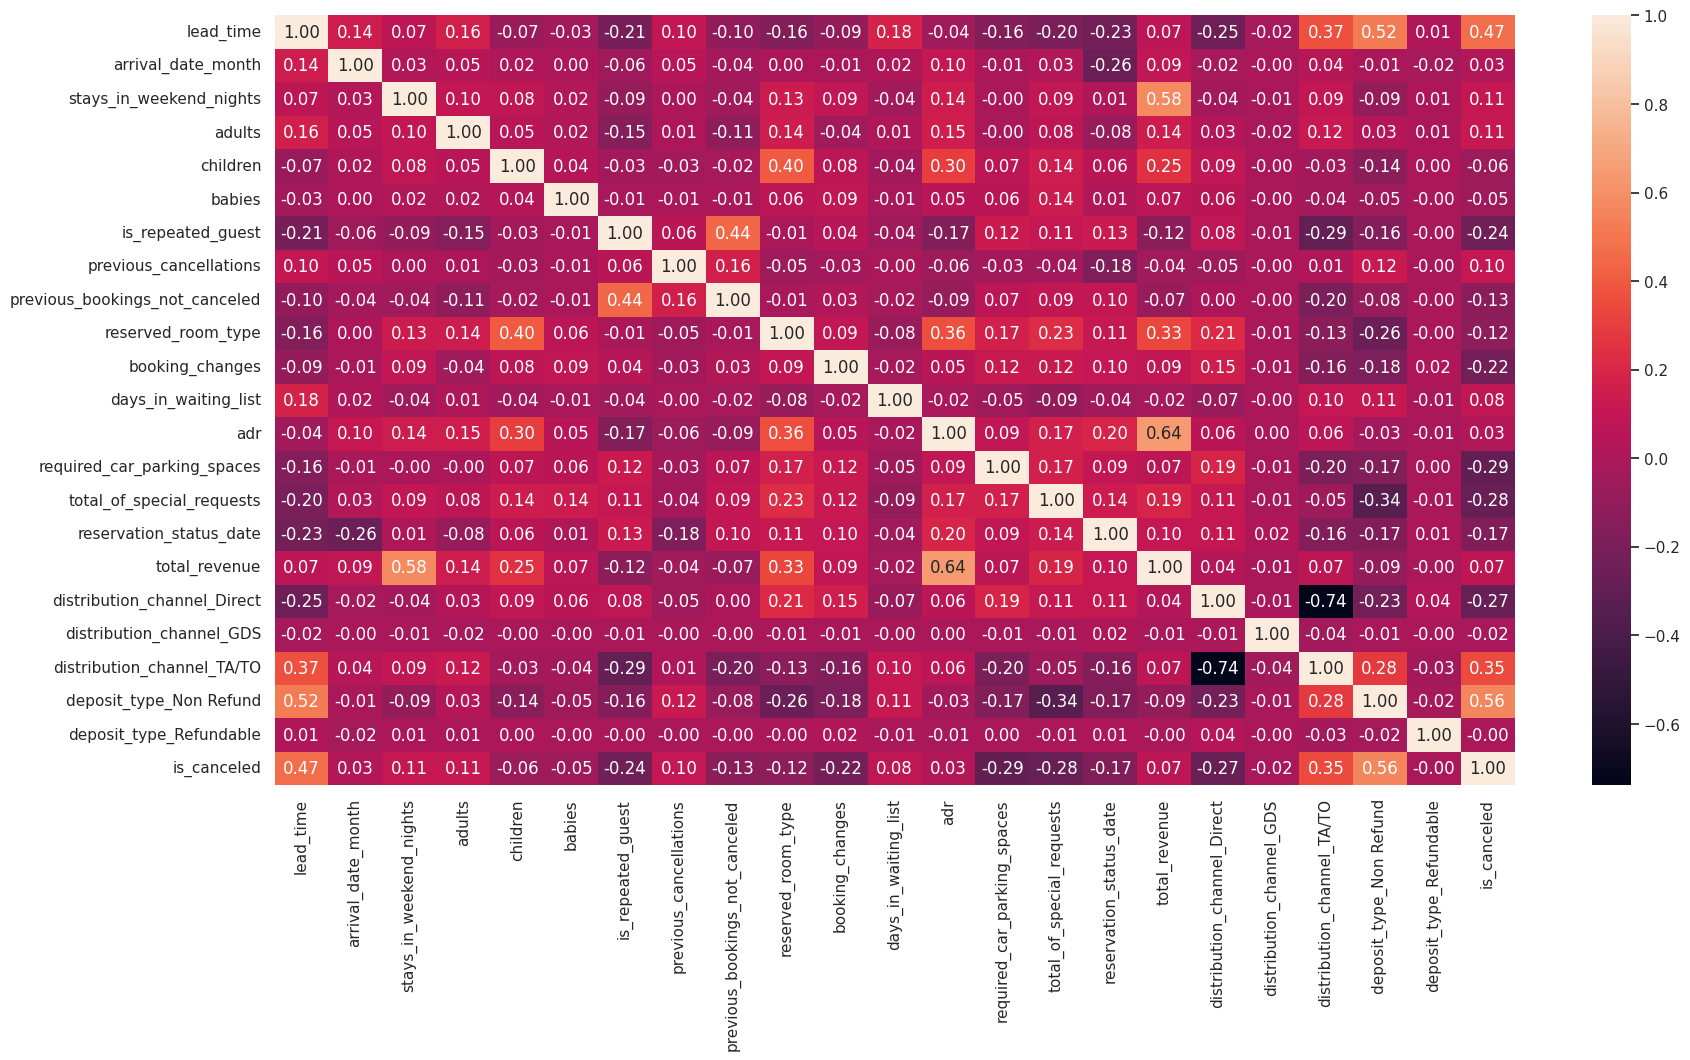

In [57]:
X_train_scaled.index = y_train.index
df_corr = pd.concat([X_train_scaled, y_train], axis=1)
corr = df_corr.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Sudah tidak dapat Feature yang korelasi tinggi yang melebihi tresshold sekitar 0.8

## Random Forest

In [58]:
model_rf = RandomForestClassifier(
  n_estimators = 100,
  max_depth = 5,
  random_state = 11,
)

model_rf.fit(X_train_scaled, y_train.values.ravel())

RandomForestClassifier(max_depth=5, random_state=11)

### Evaluation

#### Training

In [59]:
#evaluation validation
y_train_pred = model_rf.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     11830
           1       0.84      0.85      0.85     15331

    accuracy                           0.83     27161
   macro avg       0.82      0.82      0.82     27161
weighted avg       0.83      0.83      0.83     27161



#### Testing

In [60]:
y_test_pred = model_rf.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2958
           1       0.84      0.85      0.84      3833

    accuracy                           0.82      6791
   macro avg       0.82      0.82      0.82      6791
weighted avg       0.82      0.82      0.82      6791



## Decision Tree

In [61]:
model_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=11
)

model_dt.fit(X_train_scaled, y_train.values.ravel())

DecisionTreeClassifier(max_depth=5, random_state=11)

### Evaluation

#### Training

In [62]:
y_train_pred = model_dt.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76     11830
           1       0.80      0.89      0.84     15331

    accuracy                           0.81     27161
   macro avg       0.81      0.80      0.80     27161
weighted avg       0.81      0.81      0.81     27161



#### Testing

In [63]:
y_test_pred = model_dt.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      2958
           1       0.79      0.89      0.84      3833

    accuracy                           0.81      6791
   macro avg       0.81      0.79      0.80      6791
weighted avg       0.81      0.81      0.80      6791



## XGBoost

In [64]:
model_xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8
)

model_xgb.fit(X_train_scaled, y_train.values.ravel())

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:23:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

### Evaluation

#### Training

In [65]:
y_train_pred = model_xgb.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76     11830
           1       0.80      0.88      0.84     15331

    accuracy                           0.81     27161
   macro avg       0.81      0.79      0.80     27161
weighted avg       0.81      0.81      0.80     27161



#### Testing

In [66]:
y_test_pred = model_xgb.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2958
           1       0.80      0.88      0.84      3833

    accuracy                           0.80      6791
   macro avg       0.81      0.79      0.80      6791
weighted avg       0.81      0.80      0.80      6791



# Base Model Comparasion

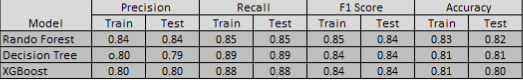

Metrik utama yang digunakan adalah Recall, karena tujuan proyek ini untuk meminimalkan risiko kehilangan pelanggan yang benar-benar melakukan pembatalan. Dari tiga model yang diuji, Random Forest dipilih karena performanya paling seimbang. Dengan nilai Recall 0.85 untuk Training dan Testing walaupun nilainya bukan yang paling tinggi tapi dari segi model dari ke 3 model di atas model random forest paling seimbang

# Model With Tunning

## Random Forest

In [67]:
rf_gridcv = RandomForestClassifier(random_state=42, n_jobs=-1)

# Input Parameters
param_grid = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

In [68]:
rf_gridcv = GridSearchCV(
    estimator=rf_gridcv,
    param_grid=param_grid,
    cv=5,
    scoring='recall'
)

rf_gridcv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [69]:
cv_result = pd.DataFrame(rf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.925771,1
1,"{'max_depth': 1, 'n_estimators': 20}",0.897137,2
2,"{'max_depth': 1, 'n_estimators': 30}",0.894593,3
6,"{'max_depth': 2, 'n_estimators': 20}",0.891462,4
8,"{'max_depth': 2, 'n_estimators': 40}",0.891201,5
5,"{'max_depth': 2, 'n_estimators': 10}",0.890874,6
10,"{'max_depth': 3, 'n_estimators': 10}",0.886831,7
7,"{'max_depth': 2, 'n_estimators': 30}",0.883700,8
3,"{'max_depth': 1, 'n_estimators': 40}",0.883633,9
11,"{'max_depth': 3, 'n_estimators': 20}",0.882787,10


### Evaluation

#### Training

In [70]:
from sklearn.metrics import classification_report

y_pred = rf_gridcv.best_estimator_.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69     11830
           1       0.74      0.93      0.82     15331

    accuracy                           0.78     27161
   macro avg       0.80      0.75      0.76     27161
weighted avg       0.79      0.78      0.77     27161



#### Testing

In [71]:
y_pred = rf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      2958
           1       0.74      0.93      0.82      3833

    accuracy                           0.78      6791
   macro avg       0.80      0.75      0.76      6791
weighted avg       0.79      0.78      0.77      6791



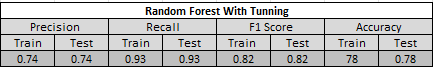

 Setelah dilakukan hyperparameter tuning, nilai recall meningkat dari 0.85 menjadi 0.93, menandakan model lebih akurat dalam mendeteksi potensi pembatalan pelanggan.

# Plot ROC

In [72]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_scores, title="ROC AUC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_precision_recall_with_opt_threshold(y_true, y_scores, title="Precision-Recall Curve"):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    thresholds = np.append(thresholds, 1.0)

    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_index]
    best_f1 = f1_scores[best_index]

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'AP = {average_precision_score(y_true, y_scores):.2f}')
    plt.scatter(recall[best_index], precision[best_index],
                color='red', zorder=10,
                label=f'Best F1 = {best_f1:.2f}\nThreshold = {best_threshold:.2f}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return best_threshold

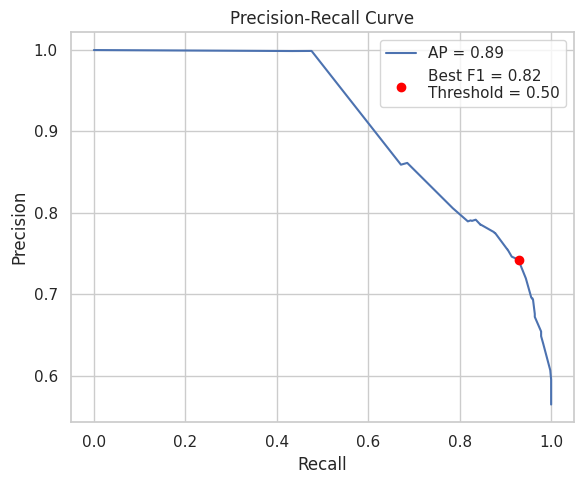

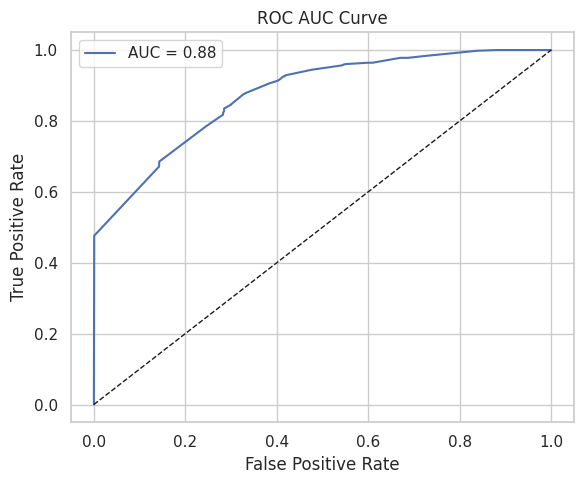

In [73]:
y_proba = rf_gridcv.best_estimator_.predict_proba(X_test)[:, 1]

best_thresh = plot_precision_recall_with_opt_threshold(y_test, y_proba)
plot_roc_curve(y_test, y_proba)

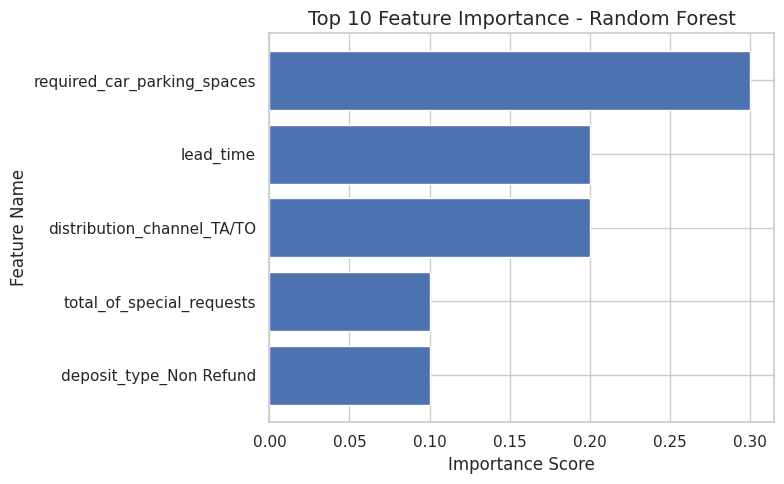

In [74]:
best_rf = rf_gridcv.best_estimator_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()  # Supaya fitur terpenting ada di atas
plt.title("Top 10 Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

Terdapat 5 feature yang paling kontribusi dalam proses modeling, dan req parking space adalah yang paling berkontrabusi

SHAP shape: (27161, 22, 2)


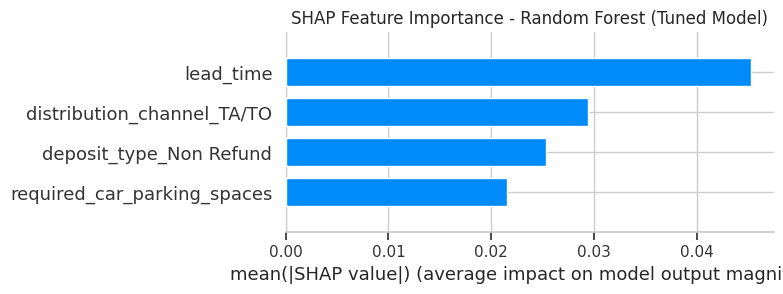

In [86]:
import shap

best_rf = rf_gridcv.best_estimator_

# Buat explainer SHAP
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train)

print("SHAP shape:", np.array(shap_values).shape)

# Jika 3D → ubah menjadi 2D dengan mengambil kelas target (1)
if shap_values.ndim == 3:
    shap_class1 = shap_values[:, :, 1]
else:
    shap_class1 = shap_values

# Plot bar SHAP
plt.title("SHAP Feature Importance - Random Forest (Tuned Model)")
shap.summary_plot(shap_class1, X_train, plot_type="bar", max_display=4)

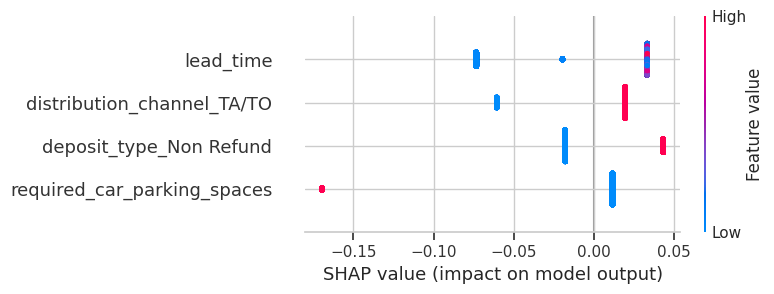

In [87]:
shap.summary_plot(shap_class1, X_train, plot_type="dot", max_display=4)

* lead_time → titik merah di sisi kanan →
berarti lead_time tinggi (pemesanan jauh hari) meningkatkan probabilitas pembatalan.

* distribution_channel_TA/TO → distribusi titik merah di sisi kanan →
berarti pemesanan lewat agen perjalanan cenderung lebih sering dibatalkan dibandingkan pemesanan langsung.

* deposit_type_Non Refund → titik merah di sisi kiri →
berarti deposit non-refundable menurunkan kemungkinan pembatalan.

* required_car_parking_spaces → sebagian besar titik biru di kanan dan merah di kiri →
berarti pelanggan yang tidak butuh parkir (nilai rendah) lebih sering membatalkan.

* total_revenue → nilai rendah (biru) di kanan →
berarti pelanggan dengan total revenue kecil lebih cenderung membatalkan, sedangkan pelanggan dengan total revenue besar (merah) lebih stabil.

# Conclusion & Rekomendation

**Conclusion :**
* Lead time: Semakin panjang jarak waktu antara
pemesanan dan tanggal kedatangan, semakin tinggi kemungkinan pembatalan.

* Special request: Pelanggan yang tidak mengajukan permintaan khusus cenderung lebih sering membatalkan pemesanan.

* Car parking space: Pelanggan yang tidak memerlukan tempat parkir memiliki tingkat pembatalan lebih tinggi dibandingkan yang melakukan permintaan parkir.

* Deposit type: Tipe pembayaran Non Refund memiliki tingkat pembatalan paling tinggi dibandingkan Refundable.

* Customer segment: TA/TO memiliki tingkat pembatalan tertinggi di antara semua segmen pelanggan.
---

---
**Recommendation :**
1. Lead Time
  * Kirim reminder email secara berkala kepada pelanggan yang memesan jauh hari sebelum tanggal kedatangan.
  * Tawarkan harga kompetitif atau diskon early-booking untuk mengurangi kemungkinan pelanggan berpindah ke hotel lain.

2. Special Request
  * Buat paket bundling permintaan khusus (special request) dengan harga menarik agar pelanggan lebih berkomitmen untuk tidak membatalkan pesanan.

3. Car Parking Space
  * Lakukan tracking kebutuhan kendaraan pelanggan sejak awal reservasi untuk memastikan ketersediaan parkir.
  * Berikan penawaran bundling parkir + kamar bagi pelanggan yang membawa kendaraan untuk meningkatkan retensi.

4. Deposit Type
  * Terapkan sistem refundable deposit, agar pelanggan tetap merasa aman namun memiliki tanggung jawab finansial atas pemesanan.
  * Untuk tipe Non-Refund, berikan penawaran eksklusif atau benefit tambahan agar pelanggan merasa menjadi prioritas dan enggan membatalkan.

5. Customer Segment
  * Tingkatkan koordinasi dan komunikasi dengan agen perjalanan (TA/TO) untuk memastikan validitas dan kepastian pemesanan grup.